In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
#importing data
usa_house_data=pd.read_csv("C:/Users/shivani.mathur01/Desktop/Work/python/files/USA_Housing.csv")
usa_house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
usa_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


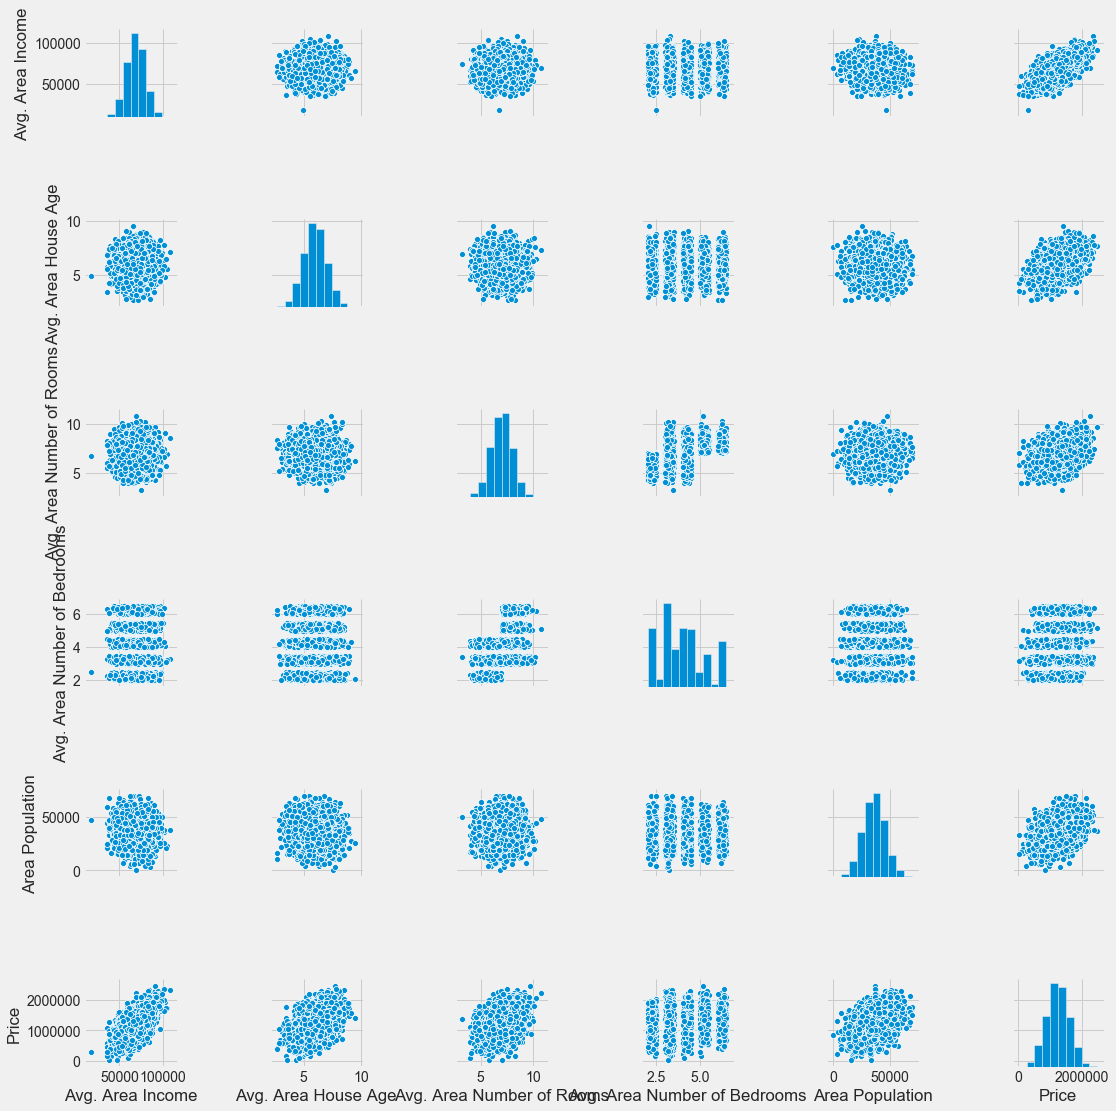

In [5]:
sns.pairplot(usa_house_data)

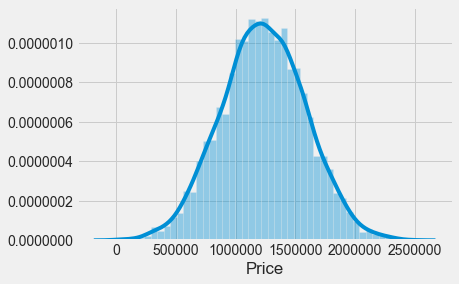

In [6]:
sns.distplot(usa_house_data["Price"])

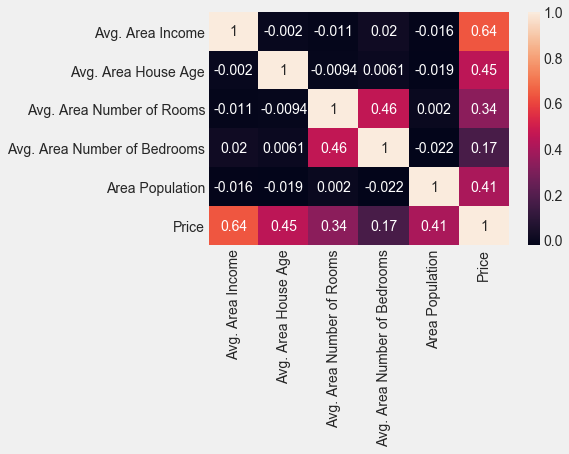

In [7]:
sns.heatmap(usa_house_data.corr(),annot=True)

In [8]:
X = usa_house_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = usa_house_data['Price']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [12]:
def cross_val(model):
    pred=cross_val_score(model,X,y,cv=10)
    return pred.mean()

def print_evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_sq=metrics.r2_score(true,predicted)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("r2_sq:", r2_sq)
    return mae, mse, rmse, r2_sq

def evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_sq=metrics.r2_score(true,predicted)
    return mae, mse, rmse, r2_sq

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("std_scaler",StandardScaler())])

X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

linReg=LinearRegression(normalize=True)
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
coeff=pd.DataFrame(linReg.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [16]:
pred=linReg.predict(X_test)

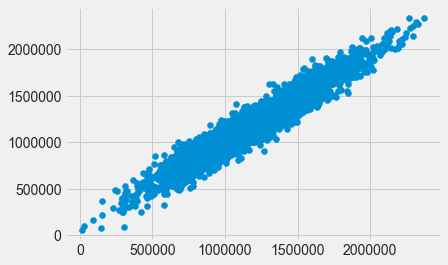

In [20]:
prd=linReg.predict(X_train)
plt.scatter(y_train,prd)

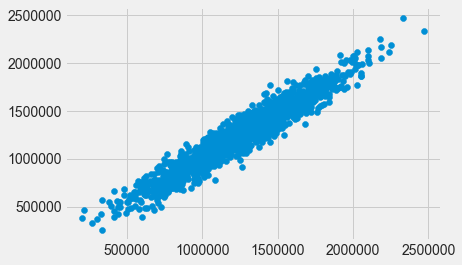

In [66]:
plt.scatter(y_test,pred)

In [67]:
test_pred=linReg.predict(X_test)
train_pred=linReg.predict(X_train)
print_evaluate(y_test,test_pred)
print("---------------------------------")
print_evaluate(y_train,train_pred)

MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
r2_sq: 0.9146818498754016
---------------------------------
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
r2_sq: 0.9192986579075526


(81480.4997317489, 10287043161.197224, 101425.06180031257, 0.9192986579075526)

In [69]:
result_df=pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,test_pred),cross_val(LinearRegression())]],columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
result_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
